In [50]:
#imports
import numpy as np 
import pandas as pd 
import itertools 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix
import matplotlib.pyplot as plt

import pickle

In [51]:
#dataset
df=pd.read_csv('news.csv')
# sns.pairplot(df,hue='species')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [52]:
#les entrees(inputs)
labels=df.label 
labels.head()


0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [53]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7) 

In [54]:
#DataFlair - Initialize a TfidfVectorizer 
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7) 
#DataFlair - Fit and transform train set, transform test set 
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test) 

In [55]:
#DataFlair - Initialize a PassiveAggressiveClassifier 
pac=PassiveAggressiveClassifier(max_iter=50) 
pac.fit(tfidf_train,y_train) 
#DataFlair - Predict on the test set and calculate accuracy 
y_pred=pac.predict(tfidf_test) 
score=accuracy_score(y_test,y_pred) 
print(f'Accuracy: {round(score*100,2)}%') 


Accuracy: 93.05%


In [56]:
#ptit test
data=tfidf_vectorizer.transform(['Daniel Greenfield, a Shillman Journalism Fello...	']) 
print(pac.predict(data))


['FAKE']


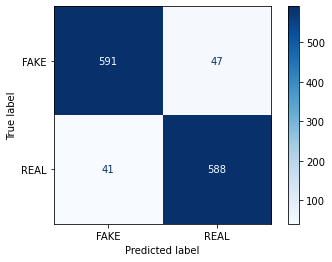

In [57]:
#DataFlair - Build confusion matrix 
plot_confusion_matrix(pac,tfidf_test,y_test,cmap=plt.cm.Blues)


In [58]:
#enregistrement du model
with open('PassiveAggressiveClassifier.pkl', 'wb') as f:
    pickle.dump(pac, f)
with open('TfidfVectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
    
